In [ ]:
# !pip install tensorflow==2.8

# 1. Real estate agents want help to predict the house price for regions in the USA. He gave you the dataset to work on and you decided to use the Linear Regression Model. Create a model that will help him to estimate what the house would sell for.
URL for a dataset: https://github.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/blob/master/USA_Housing.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
X = df.drop('Price', axis=1)

In [ ]:
X = df.drop('Address', axis=1)

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([1339096.07724513, 1251794.17883686, 1340094.96620542, ...,
       1472887.24706053, 1409762.1194903 , 1009606.28363319])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 1.5954719856381417e-10
MSE: 4.604527570137527e-20
RMSE: 2.1458162945922297e-10
R-squared: 1.0


# 2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.
a. Perform Data Pre-processing

b. Define Model and perform training

c. Evaluate Results using confusion matrix.


a. Perform Data Pre-processing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to have a single channel (grayscale)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


b. Define Model and Perform Training


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
422/422 [==============================] - 46s 107ms/step - loss: 0.3003 - accuracy: 0.9092 - val_loss: 0.0737 - val_accuracy: 0.9775
Epoch 2/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0981 - accuracy: 0.9718 - val_loss: 0.0460 - val_accuracy: 0.9848
Epoch 3/10
422/422 [==============================] - 44s 105ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 4/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 5/10
422/422 [==============================] - 45s 107ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 6/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 0.0340 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 44s 104ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0313 - val_ac

c. Evaluate Results Using Confusion Matrix

Accuracy: 99.05%


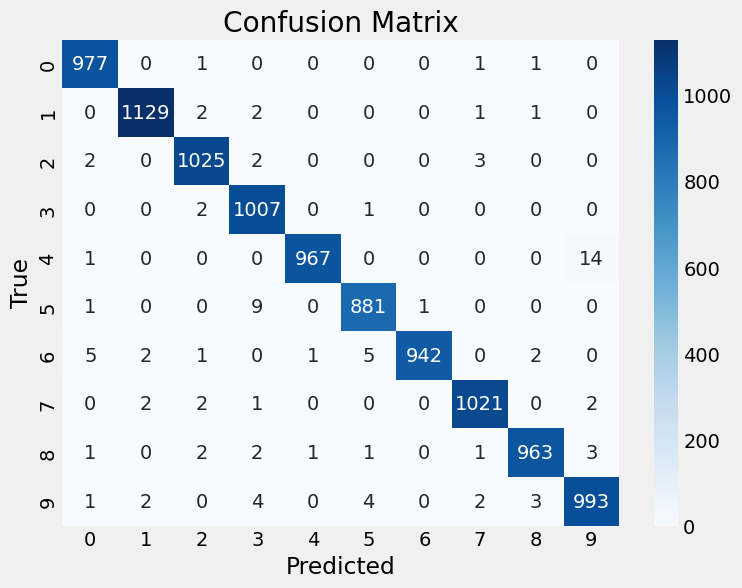

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 3. Design RNN or its variant including LSTM or GRU

a) Select a suitable time series dataset. Example – predict sentiments based on product reviews

b) Apply for prediction


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

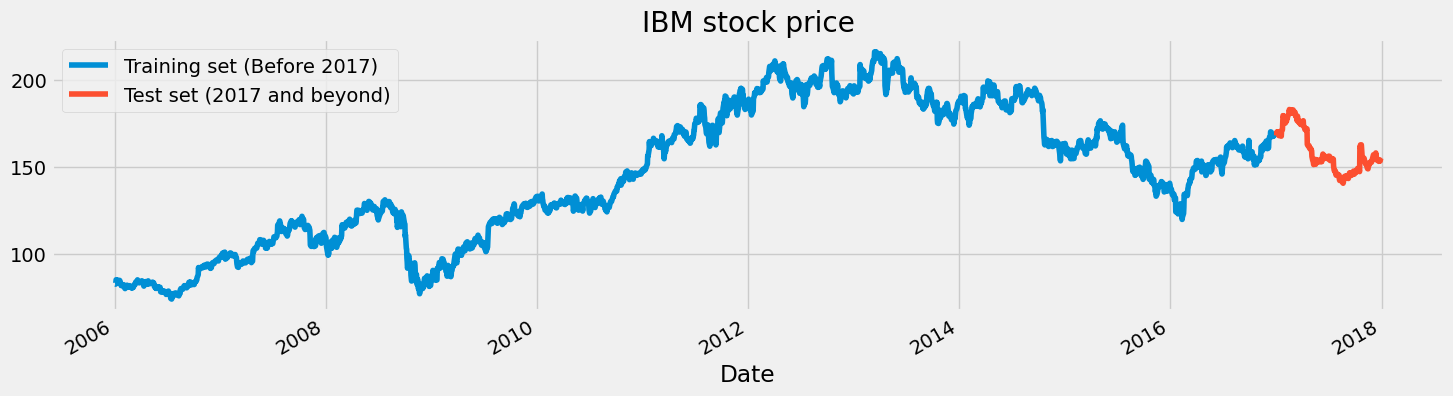

In [ ]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 20s 131ms/step - loss: 0.0209
Epoch 2/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0103
Epoch 3/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0079
Epoch 4/50
85/85 [==============================] - 12s 147ms/step - loss: 0.0077
Epoch 5/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0064
Epoch 6/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0054
Epoch 7/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0052
Epoch 8/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0046
Epoch 9/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0043
Epoch 10/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0040
Epoch 11/50
85/85 [==============================] - 12s 139ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 12s 139ms/step - loss: 0.0036
Epoch 13/50
8

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

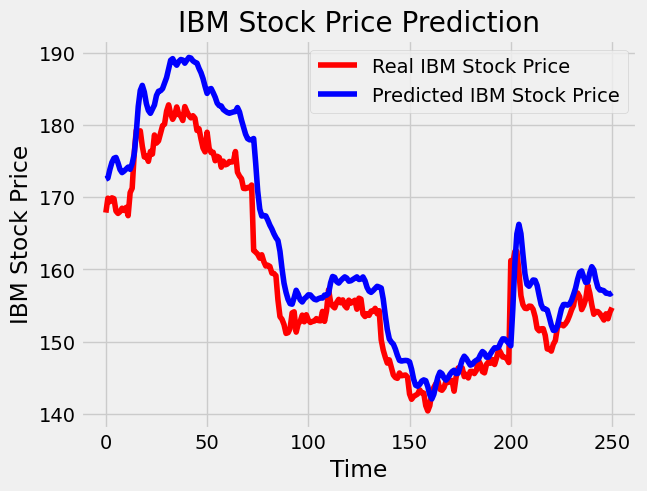

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 5.026573889054754.


LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have Gated Recurrent Units(GRU). It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 12s 228ms/step - loss: 0.1123
Epoch 2/50
19/19 [==============================] - 5s 278ms/step - loss: 0.0317
Epoch 3/50
19/19 [==============================] - 4s 228ms/step - loss: 0.0067
Epoch 4/50
19/19 [==============================] - 5s 276ms/step - loss: 0.0047
Epoch 5/50
19/19 [==============================] - 4s 228ms/step - loss: 0.0040
Epoch 6/50
19/19 [==============================] - 4s 225ms/step - loss: 0.0036
Epoch 7/50
19/19 [==============================] - 5s 277ms/step - loss: 0.0034
Epoch 8/50
19/19 [==============================] - 4s 229ms/step - loss: 0.0033
Epoch 9/50
19/19 [==============================] - 4s 236ms/step - loss: 0.0031
Epoch 10/50
19/19 [==============================] - 5s 258ms/step - loss: 0.0032
Epoch 11/50
19/19 [==============================] - 4s 225ms/step - loss: 0.0029
Epoch 12/50
19/19 [==============================] - 5s 276ms/step - loss: 0.0027
Epoch 13/50
19/19 [=====

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

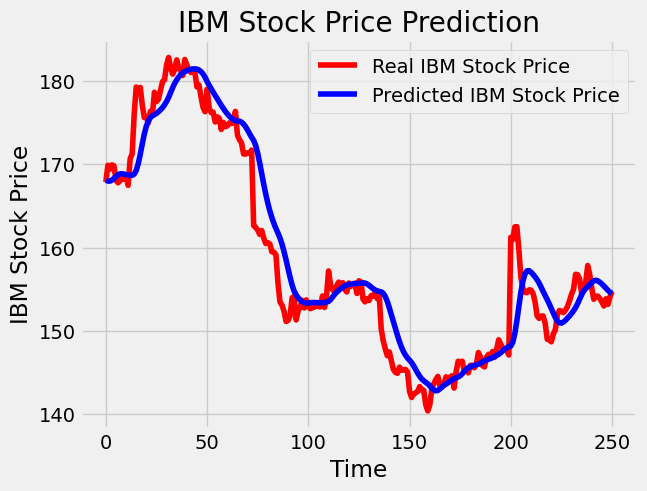

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.3893920658207084.


Sequence Generation
Here, I will generate a sequence using just initial 60 values instead of using last 60 values for every new prediction. Due to doubts in various comments about predictions making use of test set values, I have decided to include sequence generation. The above models make use of test set so it is using last 60 true values for predicting the new value(I will call it a benchmark). This is why the error is so low. Strong models can bring similar results like above models for sequences too but they require more than just data which has previous values. In case of stocks, we need to know the sentiments of the market, the movement of other stocks and a lot more. So, don't expect a remotely accurate plot. The error will be great and the best I can do is generate the trend similar to the test set.

I will use GRU model for predictions. You can try this using LSTMs also. I have modified GRU model above to get the best sequence possible. I have run the model four times and two times I got error of around 8 to 9. The worst case had an error of around 11. Let's see what this iterations.

The GRU model in the previous versions is fine too. Just a little tweaking was required to get good sequences. The main goal of this kernel is to show how to build RNN models. How you predict data and what kind of data you predict is up to you. I can't give you some 100 lines of code where you put the destination of training and test set and get world-class results. That's something you have to do yourself.

In [ ]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

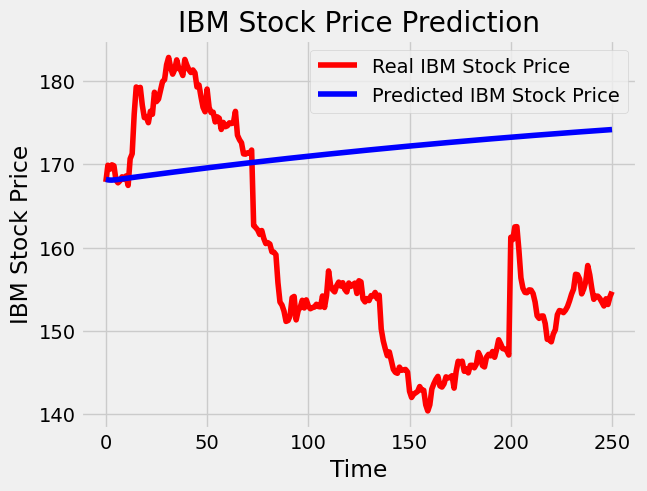

In [ ]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

The root mean squared error is 18.735867515731535.


So, GRU works better than LSTM in this case. Bidirectional LSTM is also a good way so make the model stronger. But this may vary for different data sets. Applying both LSTM and GRU together gave even better results.

# 4. Design and implement a CNN for Image Classification
a) Select a suitable image classification dataset (medical imaging, agricultural, etc.).

b) Optimized with different hyper-parameters including learning rate, filter size, no. of layers, optimizers, dropouts, etc.


11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


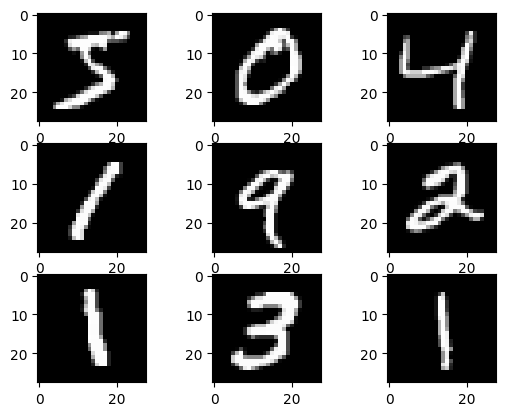

In [ ]:
import tensorflow
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	model.save('final_model.h5')

run_test_harness()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.datasets import mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = load_model('final_model.h5')
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

run_test_harness()

> 99.200


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

model = load_model('final_model.h5')

y_pred = model.predict(testX)

cm = confusion_matrix(np.argmax(testY, axis=1), np.argmax(y_pred, axis=1))
print(cm)

313/313 [==============================] - 4s 11ms/step
[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1132    0    0    0    0    0    1    2    0]
 [   0    0 1025    0    1    0    1    3    2    0]
 [   0    0    1 1003    0    4    0    0    2    0]
 [   0    0    0    0  970    0    1    0    2    9]
 [   2    0    0    5    0  883    1    0    0    1]
 [   1    2    0    1    1    1  950    0    2    0]
 [   0    1    3    0    0    0    0 1021    1    2]
 [   3    0    0    0    0    0    0    0  970    1]
 [   0    0    0    4    4    4    0    4    2  991]]


# `OR`

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Set up the layers of the network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Evaluate the model on the MNIST test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1544 - accuracy: 0.9528 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 2/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 3/3
313/313 [==============================] - 4s 11ms/step - loss: 0.0371 - accuracy: 0.9880
Test accuracy: 0.9879999756813049


# 5. Perform Sentiment Analysis in the network graph using RNN.

In [ ]:
!pip --upgrade tensorflow


Usage:   
  pip3 <command> [options]

no such option: --upgrade


Epoch 1/80
1/1 [==============================] - 11s 11s/step - loss: 0.6938 - accuracy: 0.7500 - val_loss: 0.6921 - val_accuracy: 1.0000
Epoch 2/80
1/1 [==============================] - 0s 130ms/step - loss: 0.6877 - accuracy: 0.7500 - val_loss: 0.6911 - val_accuracy: 1.0000
Epoch 3/80
1/1 [==============================] - 0s 181ms/step - loss: 0.6816 - accuracy: 1.0000 - val_loss: 0.6889 - val_accuracy: 1.0000
Epoch 4/80
1/1 [==============================] - 0s 212ms/step - loss: 0.6754 - accuracy: 1.0000 - val_loss: 0.6859 - val_accuracy: 1.0000
Epoch 5/80
1/1 [==============================] - 0s 246ms/step - loss: 0.6689 - accuracy: 1.0000 - val_loss: 0.6826 - val_accuracy: 1.0000
Epoch 6/80
1/1 [==============================] - 0s 228ms/step - loss: 0.6620 - accuracy: 1.0000 - val_loss: 0.6791 - val_accuracy: 1.0000
Epoch 7/80
1/1 [==============================] - 0s 140ms/step - loss: 0.6546 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 1.0000
Epoch 8/80
1/1 [=====

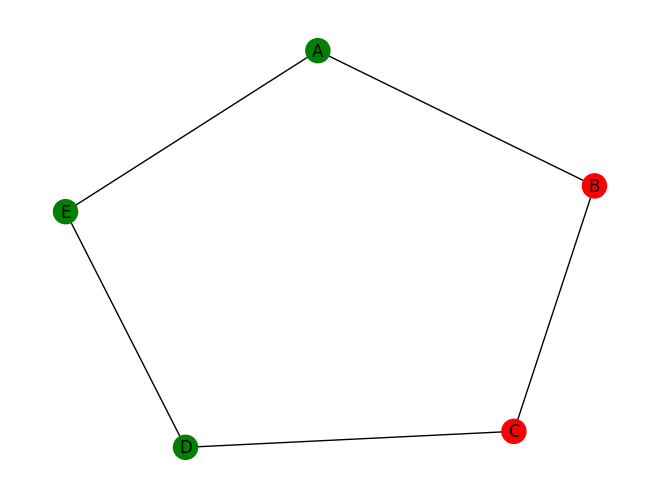

In [1]:
import networkx as nx
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a sample network graph
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('A', 'E')])

# Add node features (text data) and sentiment labels
node_features = {
    'A': "This is a positive message.",
    'B': "I'm not sure about this.",
    'C': "This is a negative comment.",
    'D': "I really enjoyed this.",
    'E': "The product was BEST."
}

node_sentiments = {
    'A': 1,
    'B': 0,
    'C': 0,
    'D': 1,
    'E': 1
}

for node in G.nodes():
    G.nodes[node]['text'] = node_features[node]
    G.nodes[node]['sentiment'] = node_sentiments[node]

# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(node_features.values()))
X = tokenizer.texts_to_sequences(list(node_features.values()))
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(text.split()) for text in node_features.values()])
X = pad_sequences(X, maxlen=max_length, padding='post')

# Create the RNN model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
y = np.array([node_sentiments[node] for node in G.nodes()])
model.fit(X, y, epochs=80, batch_size=32, validation_split=0.2)

# Perform sentiment analysis on the network graph
node_sentiments = model.predict(X)

# Print sentiment predictions for each node
for node, sentiment in zip(G.nodes(), node_sentiments):
    print(f"Node {node}: Sentiment Prediction = {'Positive' if sentiment > 0.5 else 'Negative'}")

# Visualize the network graph with sentiment information
pos = nx.spring_layout(G)
node_colors = ['green' if sentiment > 0.5 else 'red' for sentiment in node_sentiments]
nx.draw(G, pos, with_labels=True, node_color=node_colors)


In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [2]:
# Load the IMDb dataset
max_features = 10000  # Consider only the top 10,000 most frequently occurring words
maxlen = 500  # Cut off reviews after 500 words
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
# Pad sequences to ensure uniform length
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
# Define the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [7]:
# Train the model
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 77s 118ms/step - loss: 0.5468 - acc: 0.7044 - val_loss: 0.3807 - val_acc: 0.8412
Epoch 2/10
625/625 [==============================] - 67s 108ms/step - loss: 0.3648 - acc: 0.8453 - val_loss: 0.3831 - val_acc: 0.8316
Epoch 3/10
625/625 [==============================] - 67s 108ms/step - loss: 0.2921 - acc: 0.8842 - val_loss: 0.3850 - val_acc: 0.8438
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2591 - acc: 0.9006 - val_loss: 0.3315 - val_acc: 0.8598
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2283 - acc: 0.9124 - val_loss: 0.3182 - val_acc: 0.8804
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1987 - acc: 0.9276 - val_loss: 0.3438 - val_acc: 0.8702
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1642 - acc: 0.9391 - val_loss: 0.4088 - val_acc: 0.8708
Epoch 8/10
625/625 [==============================] - 6

In [ ]:
# Evaluate the model on test data
print("Evaluate on test data:")
results = model.evaluate(input_test, y_test, batch_size=batch_size)
print("Test loss, Test accuracy:", results)

Evaluate on test data:
782/782 [==============================] - 19s 25ms/step - loss: 0.5638 - acc: 0.7923
Test loss, Test accuracy: [0.5638250112533569, 0.7922800183296204]


In [ ]:
# prompt: generate the inference for the above model

# Generate inference
# new_review = "This movie was absolutely terrible. I hated it."
# new_review_seq = tokenizer.texts_to_sequences([new_review])
# new_review_padded = pad_sequences(new_review_seq, maxlen=maxlen)

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the tokenizer and fit it on the texts
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(list(node_features.values()))

# Generate inference
new_review = "This movie was absolutely terrible. I hated it."
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_seq, maxlen=max_length, padding='post')
prediction = model.predict(new_review_padded)
# prediction = model.predict(new_review_padded)
if prediction > 0.5:
    print("Positive review")
else:
    print("Negative review")



NameError: name 'tokenizer' is not defined

# BI

# 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_set = pd.read_csv('User_Data.csv')

x= data_set.iloc[:,[2,3]].values
y= data_set.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[47,  5],
       [ 6, 22]])

<ipython-input-6-f12c3b33f7ab>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set==j,1],c = ListedColormap(('purple','green'))(i),label=j)


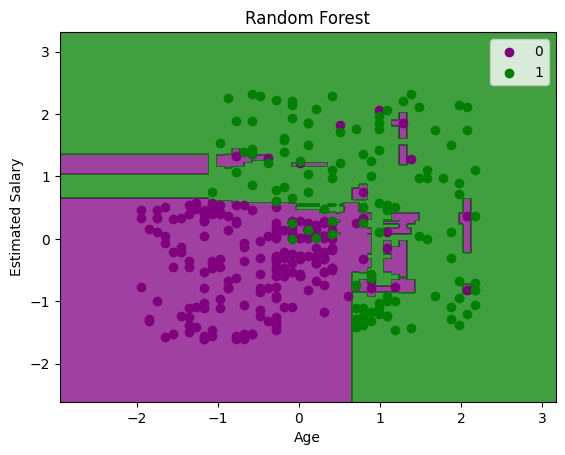

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start =x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap =ListedColormap(('purple',"green")))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set==j,1],c = ListedColormap(('purple','green'))(i),label=j)
plt.title("Random Forest")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

<ipython-input-7-6b21fcf136fb>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set==j,1],c = ListedColormap(('purple','green'))(i),label=j)


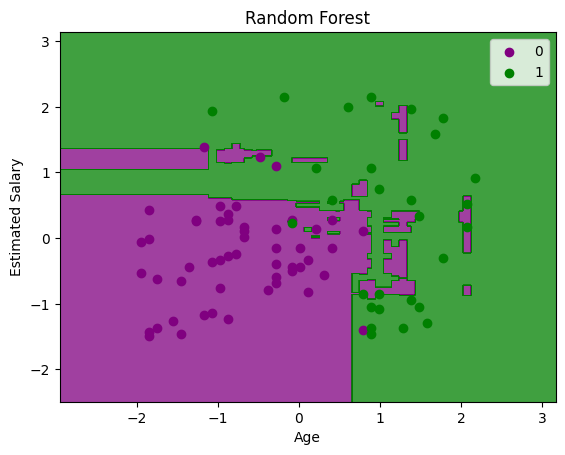

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start =x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap =ListedColormap(('purple',"green")))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set==j,1],c = ListedColormap(('purple','green'))(i),label=j)
plt.title("Random Forest")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# OR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("User_Data.csv")

# Preprocessing: Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Splitting the data into features (X) and target variable (y)
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Accuracy: 0.9
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



## 10.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("User_Data.csv")

# Preprocessing: Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Splitting the data into features (X) and target variable (y)
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.81      0.75      0.78        28

    accuracy                           0.85        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80



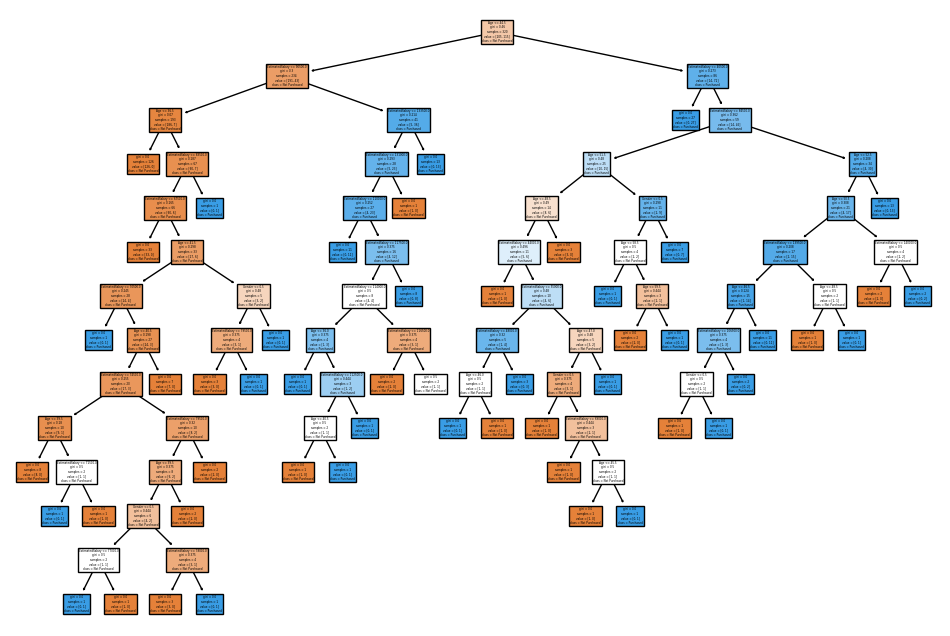

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()
